In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

STYLE = "#ffffff"

%load_ext autoreload
%autoreload 2

In [2]:
def add_plane(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # element sizes
    
    section = np.random.randint(low=0-1, high=void[0].shape[0])
    # selection of the axis to work on
    
    if axis_selection == 0:
        working_plane = void[section,:,:]
    elif axis_selection == 1:
        working_plane = void[:,section,:]  
    elif axis_selection == 2:
        working_plane = void[:,:,section]
    else:
        print("error")
    # axis selection
        
    if verbose == True:
        print(working_plane)
        print("###############################################################")
    
    #Variables
    
    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    # creates the element to be inserted
    delta = np.array(working_plane.shape) - np.array(element.shape) 
    # finds the delta between the size of the void and the size of the element
    top_left_corner = (coor_i, coor_j) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]))
    # finds the coordinates of the top left corner
    top_left_corner = np.array(top_left_corner)
    # converts the result in an array
    bottom_right_corner = np.array(top_left_corner) + np.array(element.shape) #- np.array([1,1]))
    # finds the coordinates of the bottom right corner
    working_plane[top_left_corner[0]:bottom_right_corner[0] , top_left_corner[1]:bottom_right_corner[1]] = element
    # makes the slides using the coordinates equal to the element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left corner is: {top_left_corner}")
        print(f"bottom right corner is: {bottom_right_corner}")
        print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [3]:
def add_edge(void, axis_selection, element_min_side=1, element_max_side=14, step=1, verbose=True): # element sizes
    
    section = np.random.randint(low=0-1, high=void[0].shape[0])
    # selection of the axis to work on
    
    if axis_selection == 0:
        working_plane = void[section,:,:]
    elif axis_selection == 1:
        working_plane = void[:,section,:]  
    elif axis_selection == 2:
        working_plane = void[:,:,section]
    else:
        print("error")
    # axis selection
        
    if verbose == True:
        print(working_plane)
        print("###############################################################")
    
    #Variables
    
    edge_length = random.randrange(element_min_side, element_max_side, step)
    
    edge_plane = np.random.randint(low=0, high=2)
    
    if edge_plane == 0:
        element = np.ones(edge_length).reshape(edge_length,1)
    else:
        element = np.ones(edge_length).reshape(edge_length,1).T
        
    # creates the element to be inserted
    delta = np.array(working_plane.shape) - np.array(element.shape) 
    # finds the delta between the size of the void and the size of the element
    top_left_corner = (coor_i, coor_j) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]))
    # finds the coordinates of the top left corner
    top_left_corner = np.array(top_left_corner)
    # converts the result in an array
    bottom_right_corner = np.array(top_left_corner) + np.array(element.shape) #- np.array([1,1]))
    # finds the coordinates of the bottom right corner
    working_plane[top_left_corner[0]:bottom_right_corner[0] , top_left_corner[1]:bottom_right_corner[1]] = element
    # makes the slides using the coordinates equal to the element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left corner is: {top_left_corner}")
        print(f"bottom right corner is: {bottom_right_corner}")
        print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")


In [4]:
def add_volume(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # element sizes
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth-2).reshape((element_void.shape[0],element_void.shape[1],depth-2))

    element[1:-1,1:-1,1:-1] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [5]:
def add_pipe(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # pipe not in the right direction
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    # HEREEEEE
    
    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth).reshape((element_void.shape[0],element_void.shape[1],depth))

    element[1:-1,1:-1,:] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [ ]:
def add_cantilever(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=True): # pipe not in the right direction
    
    #Variables
    
    depth = random.randrange(element_min_side, element_max_side, step)

    element = np.ones((random.randrange(element_min_side, element_max_side, step), random.randrange(element_min_side, element_max_side, step)))
    element = np.repeat(element, repeats=depth, axis=0).reshape((element.shape[0],element.shape[1],depth))

    # HEREEEEE
    
    element_void = np.zeros((element.shape[0]-2, element.shape[1]-2))
    element_void = np.repeat(element_void, repeats=depth).reshape((element_void.shape[0],element_void.shape[1],depth))

    element[1:-1,1:-1,:] = element_void

    #print(element.shape)
    #print(element_void.shape)
    
    # creates the element to be inserted
    delta = np.array(void.shape) - np.array(element.shape) # ENCONTRAR LOS NUEVOS DELTAS
    
    
    top_left_front_corner = (coor_i, coor_j, coor_k) = (np.random.randint(low=0, high=delta[0]) , np.random.randint(low=0, high=delta[1]), np.random.randint(low=0, high=delta[2]))
    # finds the coordinates of the top left corner
    top_left_front_corner = np.array(top_left_front_corner)
    # converts the result in an array
    bottom_right_back_corner = np.array(top_left_front_corner) + np.array(element.shape)

    void[top_left_front_corner[0]:bottom_right_back_corner[0] , top_left_front_corner[1]:bottom_right_back_corner[1], top_left_front_corner[2]:bottom_right_back_corner[2]] = element
    
    if verbose == True:
        print(f"void shape is: {np.array(void[0].shape)}")
        print(f"element shape is : {np.array(element.shape)}")
        print(f"the axis selection is: {axis_selection}")
        print(f"delta is: {delta}")
        print(f"section is: {section}")
        print(f"top left front corner is: {top_left_front_corner}")
        print(f"bottom right back corner is: {bottom_right_back_corner}")
        #print(f"slices are: {top_left_corner[0]}:{bottom_right_corner[0]} and {top_left_corner[1]}:{bottom_right_corner[1]}")
        print("###############################################################")

In [6]:
def generative_sculpt(void_dim=12, n_planes=25):
    
    void = np.zeros((void_dim, void_dim, void_dim))
    
    

    for i in range(n_planes):
        time.sleep(0)
        axis_selection = np.random.randint(low=0, high=3)
        add_plane(void, axis_selection, element_min_side=9, element_max_side=17, step=1, verbose=False)
        
        axis_selection = np.random.randint(low=0, high=3)
        add_edge(void, axis_selection, element_min_side=12, element_max_side=24, step=1, verbose=False)

    for i in range(n_planes):
        add_pipe(void, axis_selection, element_min_side=4, element_max_side=14, step=1, verbose=False)
    
    return void

In [9]:
data = []

count = 0

for i in range(150): #
    count = count + 1
    if count % 10 == 0:
        print("\r{0}".format(count), end='')
    data.append(generative_sculpt(void_dim=29, n_planes=10))

150

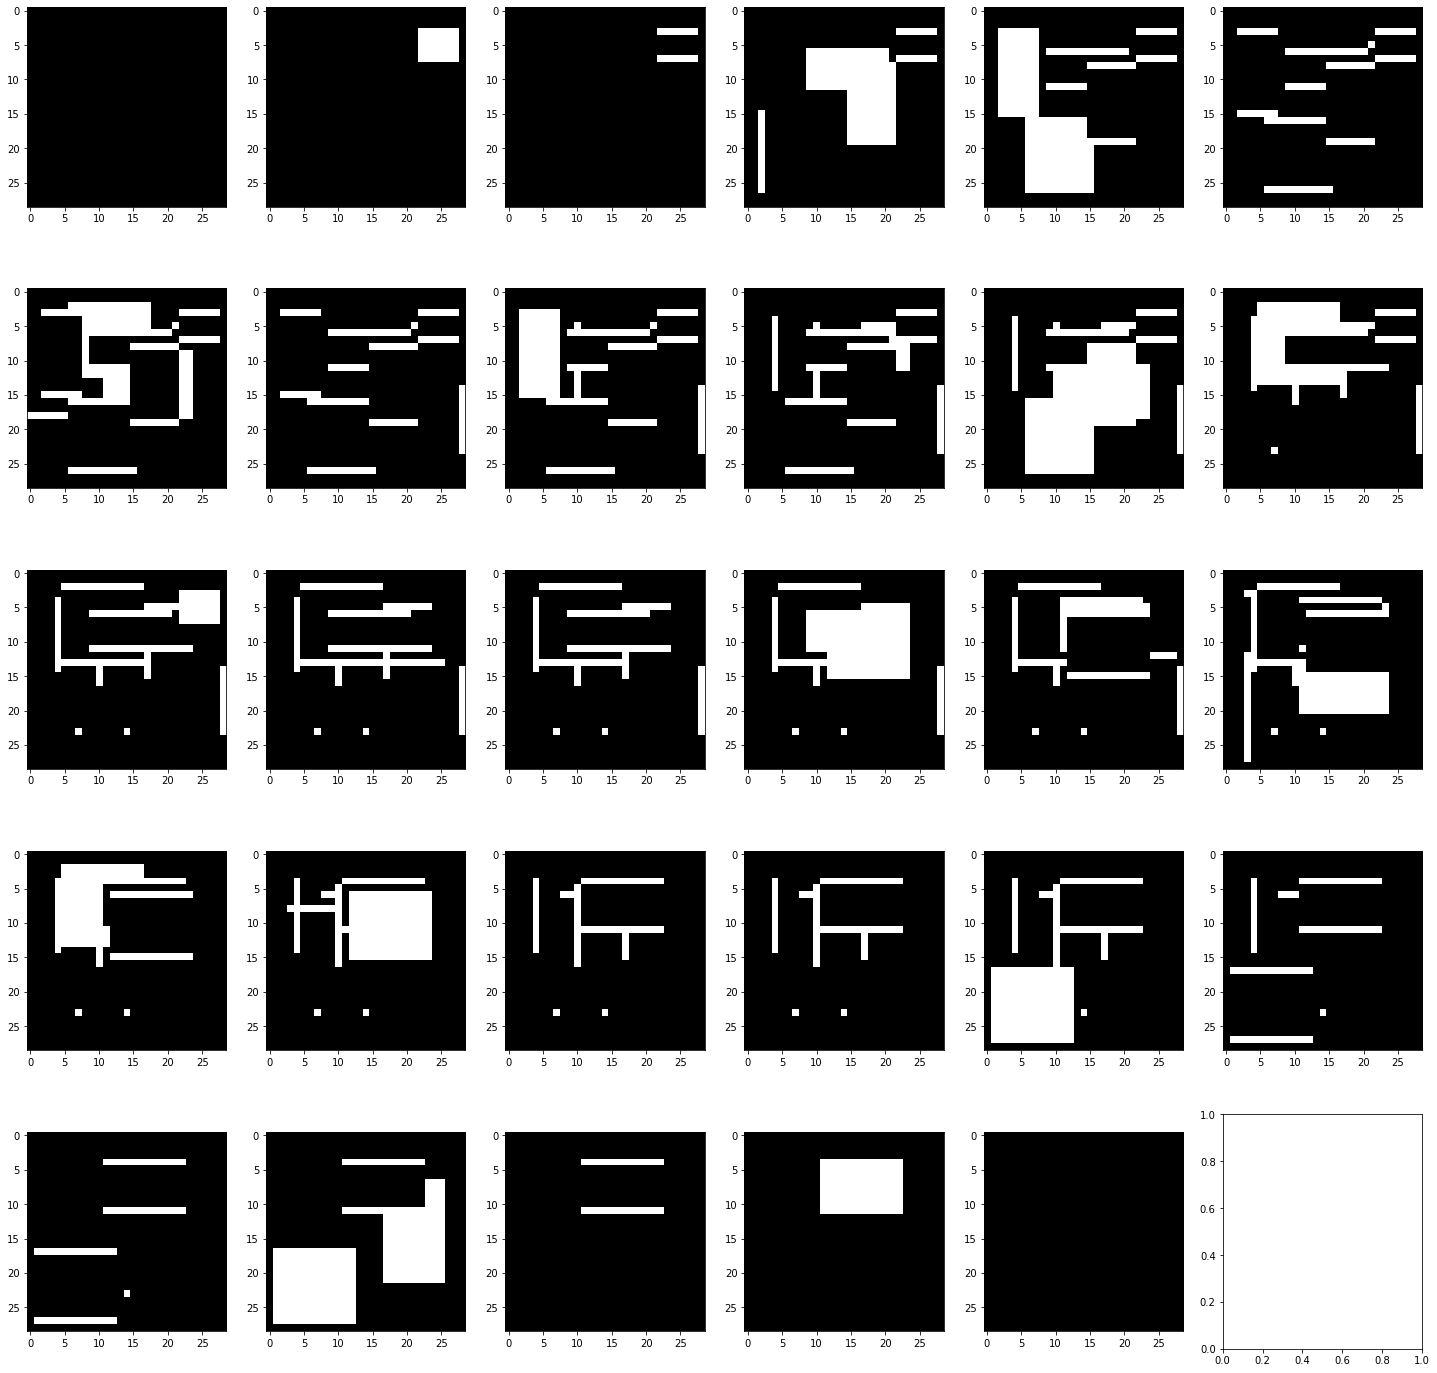

In [12]:
sculpture = data[int(len(data)*0.29)]

fig, axes = plt.subplots(ncols=6, nrows=5, figsize=(25, 25), facecolor = (STYLE))

axes = axes.ravel() # flats

for index in range(29):
    axes[index].imshow(sculpture[index,:,:], cmap = "gray")

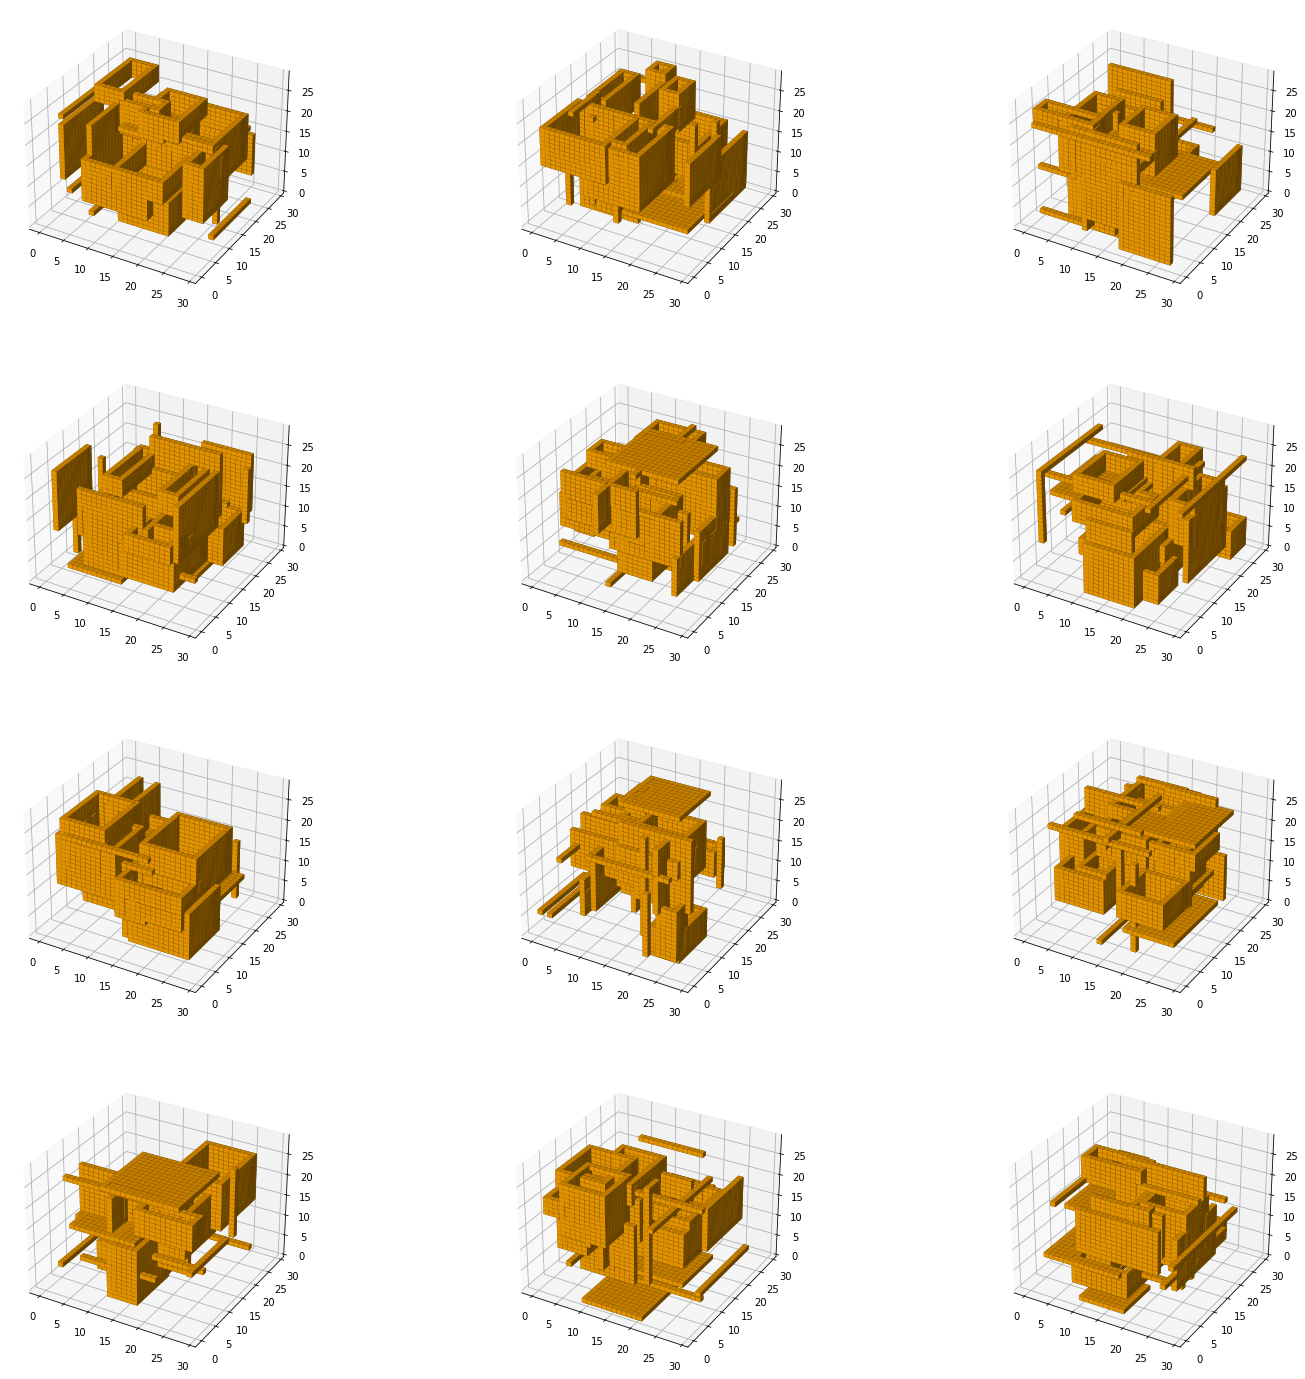

In [19]:
sculpture = data[int(len(data)*0.29)]

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(25, 25), facecolor = (STYLE), subplot_kw=dict(projection="3d"))

axes = axes.ravel() # flats

for index in range(12):
    axes[index].voxels(data[index], facecolors="orange", edgecolors="k", linewidth=0.05)